# Ripik.AI HackFest: Unleashing AI Potential


### Column	Description
>image_id: Unique identifier of the image

>filename: Filename of the image

>label:
1: crack
2: scratch
3: tire flat
4: dent
5: glass shatter
6: lamp broken

In [1]:
# !pip install tensorflow

In [2]:
# pip install keras

In [3]:
# pip install --upgrade tensorflow

In [2]:
import numpy as np
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load train file
train_df = pd.read_csv('C:/Users/grees/Downloads/Ripik/train.csv')

# Define paths to the directory containing your images
image_directory = 'C:/Users/grees/Downloads/Ripik/images_train/'

In [4]:
train_df

,image_id,filename,label
0,1,1.jpg,2
1,2,2.jpg,4
2,3,3.jpg,2
3,4,4.jpg,3
4,5,5.jpg,5
...,...,...,...
7195,7196,7196.jpg,4
7196,7197,7197.jpg,4
7197,7198,7198.jpg,4
7198,7199,7199.jpg,2


In [5]:
# Combine the directory path with the image filenames
train_df['image_path'] = image_directory + train_df['filename']

In [6]:
train_df['label'] = train_df['label'].astype(str)

In [7]:
train_df.head(5)

,image_id,filename,label,image_path
0,1,1.jpg,2,C:/Users/grees/Downloads/Ripik/images_train/1.jpg
1,2,2.jpg,4,C:/Users/grees/Downloads/Ripik/images_train/2.jpg
2,3,3.jpg,2,C:/Users/grees/Downloads/Ripik/images_train/3.jpg
3,4,4.jpg,3,C:/Users/grees/Downloads/Ripik/images_train/4.jpg
4,5,5.jpg,5,C:/Users/grees/Downloads/Ripik/images_train/5.jpg


In [8]:
print(train_df['label'].unique())

# 1: crack
# 2: scratch
# 3: tire flat
# 4: dent
# 5: glass shatter
# 6: lamp broken

['2' '4' '3' '5' '6' '1']


1. rescale=1./255:

In the context of images, pixel values are typically in the range of 0 to 255 for each channel (for RGB images). By setting rescale to 1./255, you are scaling down the pixel values to be in the range [0, 1]. Normalizing the pixel values helps in training the neural network more effectively.

2. shear_range=0.2:

Shear transformation shifts one part of an image, keeping the rest of the image fixed. The shear_range parameter defines the intensity of the shear transformation. In this case, with a value of 0.2, the images will be sheared by a maximum of 20% in the specified direction.

3. zoom_range=0.2:

This parameter controls the range of random zoom that can be applied to the images. A zoom_range of 0.2 means that the images can be zoomed in or out by a maximum of 20%. This helps the model to be more robust to variations in object sizes in the input images.

4. horizontal_flip=True:

Setting horizontal_flip to True enables random horizontal flipping of the images. This means that a given image might be horizontally flipped with a 50% probability. Horizontal flipping is a common augmentation technique and can be beneficial if the orientation of objects in the images does not convey important information (e.g., for tasks like object recognition).

In [9]:
from keras.layers import Dropout
# Split data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to be between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Define the image size and batch size
# img_size = (128, 128)
img_size = (256,256)
batch_size = 32

# Create data generators
train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)

# Define and compile your model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Additional Convolutional layers
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Additional Dense layers with dropout for regularization
# model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_df['label'].unique()), activation='softmax'))  # Adjust num_classes based on your dataset

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using fit_generator
history = model.fit_generator(
    generator=train_generator,
    epochs=10,  # Number of training epochs
    verbose=1,  # Verbosity level (0, 1, or 2)
    validation_data=val_generator
)


Found 5760 validated image filenames belonging to 6 classes.
Found 1440 validated image filenames belonging to 6 classes.





C:\Users\grees\AppData\Local\Temp\ipykernel_18620\277794521.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10


180/180 [==============================] - 282s 2s/step - loss: 1.5245 - accuracy: 0.3351 - val_loss: 1.4167 - val_accuracy: 0.4076
Epoch 2/10
180/180 [==============================] - 270s 2s/step - loss: 1.3354 - accuracy: 0.4280 - val_loss: 1.1654 - val_accuracy: 0.5229
Epoch 3/10
180/180 [==============================] - 269s 1s/step - loss: 1.1653 - accuracy: 0.5002 - val_loss: 1.0799 - val_accuracy: 0.5569
Epoch 4/10
180/180 [==============================] - 262s 1s/step - loss: 1.0818 - accuracy: 0.5493 - val_loss: 1.0906 - val_accuracy: 0.5590
Epoch 5/10
180/180 [==============================] - 257s 1s/step - loss: 0.9975 - accuracy: 0.5924 - val_loss: 0.9750 - val_accuracy: 0.5889
Epoch 6/10
180/180 [==============================] - 255s 1s/step - loss: 0.9543 - accuracy: 0.5998 - val_loss: 0.9556 - val_accuracy: 0.6042
Epoch 7/10
180/180 [==============================] - 257s 1s/step - loss: 0.8939 - accuracy: 0.6309 - val_loss: 0.8723 - val_accuracy: 0.63

In [26]:
# Evaluate the model on the test set
val_evaluation = model.evaluate(val_generator)

# Print the test loss and accuracy
print("Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(val_evaluation[0], val_evaluation[1]))

45/45 [==============================] - 38s 840ms/step - loss: 0.4985 - accuracy: 0.8174
Test Loss: 0.4985, Test Accuracy: 0.8174


In [10]:
# Predict the labels for the unseen dataset
predictions = model.predict(val_generator)

# Assuming 'predictions' is a 2D array where each row corresponds to an image and columns correspond to class probabilities
# You can extract the predicted class labels based on the highest probability
predicted_labels = np.argmax(predictions, axis=1)+1

# Assuming you have a DataFrame for the unseen dataset, you can create a new column for predicted labels
val_data['Predicted_Label'] = predicted_labels

# Now 'unseen_data' DataFrame contains both the original data and the predicted labels


45/45 [==============================] - 39s 852ms/step


In [20]:
val_data

,image_id,filename,label,image_path,Predicted_Label
3098,3099,3099.jpg,2,C:/Users/grees/Downloads/Ripik/images_train/30...,4
2531,2532,2532.jpg,5,C:/Users/grees/Downloads/Ripik/images_train/25...,2
4071,4072,4072.jpg,4,C:/Users/grees/Downloads/Ripik/images_train/40...,4
1287,1288,1288.jpg,5,C:/Users/grees/Downloads/Ripik/images_train/12...,1
2540,2541,2541.jpg,3,C:/Users/grees/Downloads/Ripik/images_train/25...,3
...,...,...,...,...,...
3790,3791,3791.jpg,3,C:/Users/grees/Downloads/Ripik/images_train/37...,3
911,912,912.jpg,5,C:/Users/grees/Downloads/Ripik/images_train/91...,1
6520,6521,6521.jpg,4,C:/Users/grees/Downloads/Ripik/images_train/65...,1
2995,2996,2996.jpg,2,C:/Users/grees/Downloads/Ripik/images_train/29...,1


In [13]:
# Write the DataFrame to an Excel file
val_data.to_excel('val_data1.xlsx', index=False)

In [11]:
np.unique(predicted_labels)

array([1, 2, 3, 4, 5, 6], dtype=int64)

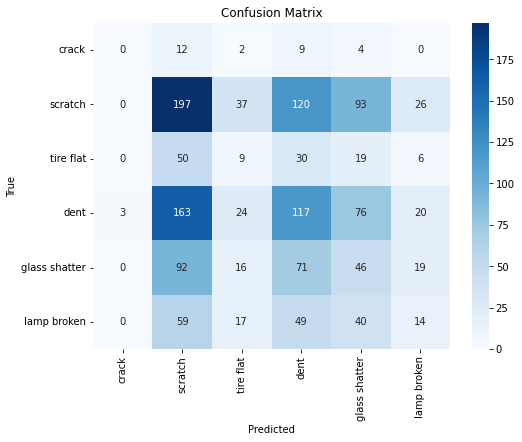

               precision    recall  f1-score   support

        crack       0.00      0.00      0.00        27
      scratch       0.34      0.42      0.38       473
    tire flat       0.09      0.08      0.08       114
         dent       0.30      0.29      0.29       403
glass shatter       0.17      0.19      0.18       244
  lamp broken       0.16      0.08      0.11       179

     accuracy                           0.27      1440
    macro avg       0.18      0.18      0.17      1440
 weighted avg       0.25      0.27      0.26      1440



In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'true_labels' are the true labels and 'predicted_labels' are the predicted labels
true_labels = val_data['label'].astype(int)  # Replace with your actual true labels
predicted_labels = val_data['Predicted_Label'] # Replace with your predicted labels

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_names = ["crack", "scratch", "tire flat", "dent", "glass shatter", "lamp broken"]
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 1: crack
# 2: scratch
# 3: tire flat
# 4: dent
# 5: glass shatter
# 6: lamp broken
# Print classification report


# Print classification report
print(classification_report(true_labels, predicted_labels, labels=np.unique(true_labels), target_names=class_names))


In [45]:
from tensorflow.keras.preprocessing import image

# Assuming 'model' is your trained model and 'img_path' is the path to your image
img_path = 'C:/Users/grees/Downloads/Ripik/images_train/3342.jpg'

# Load the image and preprocess it
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch size of 1
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Get predictions for the image
predictions = model.predict(img_array)

# Assuming 'predictions' is a 2D array where each row corresponds to an image and columns correspond to class probabilities
# You can extract the predicted class label based on the highest probability
predicted_label = np.argmax(predictions)

# Print the predicted class label
print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 58ms/step
Predicted Label: 1


In [46]:
# Load train file
test_df = pd.read_csv('C:/Users/grees/Downloads/Ripik/test.csv')

# Define paths to the directory containing your images
image_directory = 'C:/Users/grees/Downloads/Ripik/images_test/'

# Combine the directory path with the image filenames
test_df['image_path'] = image_directory + test_df['filename']

unseen_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False,  # Set shuffle to False to keep the order of predictions
    class_mode=None  # Set to None since there are no class labels in the unseen dataset
)

# Predict the labels for the unseen dataset
predictions_test = model.predict(unseen_generator)

# Assuming 'predictions' is a 2D array where each row corresponds to an image and columns correspond to class probabilities
# You can extract the predicted class labels based on the highest probability
predicted_labels = np.argmax(predictions_test, axis=1)

# Assuming you have a DataFrame for the unseen dataset, you can create a new column for predicted labels
test_df['Predicted_Label'] = predicted_labels

# Now 'unseen_data' DataFrame contains both the original data and the predicted labels


Found 4800 validated image filenames.
150/150 [==============================] - 95s 633ms/step


In [47]:
test_df

,image_id,filename,image_path,Predicted_Label
0,7201,7201.jpg,C:/Users/grees/Downloads/Ripik/images_test/720...,2
1,7202,7202.jpg,C:/Users/grees/Downloads/Ripik/images_test/720...,3
2,7203,7203.jpg,C:/Users/grees/Downloads/Ripik/images_test/720...,3
3,7204,7204.jpg,C:/Users/grees/Downloads/Ripik/images_test/720...,4
4,7205,7205.jpg,C:/Users/grees/Downloads/Ripik/images_test/720...,3
...,...,...,...,...
4795,11996,11996.jpg,C:/Users/grees/Downloads/Ripik/images_test/119...,5
4796,11997,11997.jpg,C:/Users/grees/Downloads/Ripik/images_test/119...,3
4797,11998,11998.jpg,C:/Users/grees/Downloads/Ripik/images_test/119...,3
4798,11999,11999.jpg,C:/Users/grees/Downloads/Ripik/images_test/119...,4


#### Set 1:
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to be between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

Define the image size and batch size
img_size = (128, 128)
batch_size = 32
##### loss: 0.4406 - accuracy: 0.8370 - val_loss: 0.6902 - val_accuracy: 0.7528

##### Test Loss: 0.7076, Test Accuracy: 0.7500

#### Set 2:
Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to be between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

Define the image size and batch size

img_size = (224,224)
batch_size = 32
##### loss: 0.8912 - accuracy: 0.6444 - val_loss: 1.0323 - val_accuracy: 0.6000

##### Test Loss: 1.0276, Test Accuracy: 0.6104

#### Set 3:
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to be between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

Define the image size and batch size
img_size = (224,224)
batch_size = 32

Added a layer:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

##### loss: 0.8618 - accuracy: 0.6503 - val_loss: 0.9704 - val_accuracy: 0.5986
##### Test Loss: 0.9628, Test Accuracy: 0.6104

#### Set 4:
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to be between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

Define the image size and batch size

img_size = (256,256)
batch_size = 32
Added a layer:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

##### loss: 0.8964 - accuracy: 0.6356 - val_loss: 0.9720 - val_accuracy: 0.6167
##### Test Loss: 0.9602, Test Accuracy: 0.6285

#### Set 5:
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to be between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

Define the image size and batch size
img_size = (128, 128)
batch_size = 32
Added a layer:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

##### loss: 0.4020 - accuracy: 0.8528 - val_loss: 0.6292 - val_accuracy: 0.7736
##### Test Loss: 0.6178, Test Accuracy: 0.7889

#### Set 6: 
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to be between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

Define the image size and batch size

img_size = (256,256)
batch_size = 32
Added a layer:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
##### Test Loss: 0.4985, Test Accuracy: 0.8174

#### Set 7:

datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to be between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

Define the image size and batch size
img_size = (256,256)
batch_size = 32
Additional Convolutional layers
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

Additional Dense layers with dropout for regularization
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(256, activation='relu'))
##### accuracy: 0.23
##### loss: 0.6313 - accuracy: 0.7490 - val_loss: 0.7179 - val_accuracy: 0.7264

#### Set 8:

datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to be between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

Additional Convolutional layers
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(128, activation='relu'))
##### accuracy: 0.27
##### loss: 0.7420 - accuracy: 0.7087 - val_loss: 0.7745 - val_accuracy: 0.7021